In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from sklearn.metrics import mean_squared_error


In [31]:
df = pd.read_csv('cloudy_cluster.csv')
df.head()

,GHI,Clearsky DHI,cluster,DHI,DNI,Wind Speed,Relative Humidity,Temperature,Clearsky DNI,Clearsky GHI,Cloud Type,Solar Zenith Angle
0,0,0,1,0,0,5.6,50.05,-5.4,0,0,7,163.33
1,0,0,1,0,0,5.7,49.67,-5.3,0,0,7,162.48
2,0,0,1,0,0,5.8,52.92,-5.1,0,0,8,159.58
3,0,0,1,0,0,6.0,52.45,-5.0,0,0,0,155.37
4,0,0,1,0,0,6.1,55.58,-4.9,0,0,0,150.41


In [32]:
df.dropna(inplace=True)

In [33]:
df.drop(["cluster"],axis=1,inplace=True)

In [34]:
df.head()

,GHI,Clearsky DHI,DHI,DNI,Wind Speed,Relative Humidity,Temperature,Clearsky DNI,Clearsky GHI,Cloud Type,Solar Zenith Angle
0,0,0,0,0,5.6,50.05,-5.4,0,0,7,163.33
1,0,0,0,0,5.7,49.67,-5.3,0,0,7,162.48
2,0,0,0,0,5.8,52.92,-5.1,0,0,8,159.58
3,0,0,0,0,6.0,52.45,-5.0,0,0,0,155.37
4,0,0,0,0,6.1,55.58,-4.9,0,0,0,150.41


In [35]:
df.describe()

,GHI,Clearsky DHI,DHI,DNI,Wind Speed,Relative Humidity,Temperature,Clearsky DNI,Clearsky GHI,Cloud Type,Solar Zenith Angle
count,12635.000000,12635.000000,12635.000000,12635.000000,12635.000000,12635.000000,12635.000000,12635.000000,12635.000000,12635.000000,12635.000000
mean,45.259201,18.276138,23.818283,90.733043,2.091619,55.478055,4.675797,191.764306,83.672893,2.693550,105.951741
std,85.973604,35.184072,48.906084,203.054985,1.157924,17.844177,9.852023,316.693066,177.238869,3.077329,28.252325
min,0.000000,0.000000,0.000000,0.000000,0.200000,7.910000,-19.500000,0.000000,0.000000,0.000000,16.250000
25%,0.000000,0.000000,0.000000,0.000000,1.300000,42.360000,-3.400000,0.000000,0.000000,0.000000,84.465000
50%,0.000000,0.000000,0.000000,0.000000,1.800000,56.690000,3.400000,0.000000,0.000000,0.000000,107.280000
75%,46.000000,29.000000,29.000000,29.000000,2.700000,67.660000,13.000000,359.000000,71.000000,6.000000,126.155000
max,332.000000,339.000000,295.000000,949.000000,8.800000,98.910000,32.100000,1021.000000,1025.000000,9.000000,163.760000


In [36]:
s1= MinMaxScaler(feature_range=(-1,1))
Xs= s1.fit_transform(df)

In [37]:

s2=MinMaxScaler(feature_range=(-1,1))
Ys= s2.fit_transform(df[['GHI']])

In [38]:
Xs.shape

(12635, 11)

In [39]:
#Xs.reshape(1,662,6)

In [40]:
Ys.shape

(12635, 1)

In [41]:
window= 5
X=[]
Y=[]
for i in range(window,len(Xs)):
    X.append(Xs[i-window:i,:])
    Y.append(Ys[i])

In [42]:
X,Y = np.array(X), np.array(Y)

In [43]:
X_train1, y_train1 = X[:10108], Y[:10108]
#X_val1, y_val1 = X[3530:3971], Y[3530:3971]
X_test1, y_test1 = X[10108:], Y[10108:]
X_train1.shape, y_train1.shape,X_test1.shape, y_test1.shape


((10108, 5, 11), (10108, 1), (2522, 5, 11), (2522, 1))

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
import tensorflow as tf 
model= Sequential()
#model.add(LSTM(units=50,return_sequences=True,input_shape=(X.shape[1],X.shape[2])))  
#model.add(Dropout (0.2))
#model.add(LSTM(units=50,return_sequences=True))

#model.add(Dropout (0.2))
#model.add(LSTM(units=50))
#model.add(Dropout (0.2))
#model.add(Dense(units=1))
#model.compile(optimizer= 'adam',loss='mean_squared_error',metrics=['accuracy'])

# Adding the first LSTM layer and some Dropout regularisation
model.add(Bidirectional(LSTM(units = 64, activation='relu', return_sequences=True,input_shape=(X_train1.shape[1], X_train1.shape[2]))))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(units = 96, activation='relu',return_sequences=True )))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(units = 32, activation='relu')))
model.add(Dropout(0.1))

# Adding the output layer
model.add(Dense(units = 10))    
model.add(Dense(units = 1))     

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])

In [45]:
#from keras.callbacks import EarlyStopping
#earlyStop=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=50)
import time 
start= time.time()
history=model.fit(X_train1,y_train1,epochs=20)
end= time.time()
continental= end-start

Epoch 1/20
316/316 [==============================] - 19s 26ms/step - loss: 0.1272 - root_mean_squared_error: 0.3567
Epoch 2/20
316/316 [==============================] - 8s 25ms/step - loss: 0.0316 - root_mean_squared_error: 0.1777
Epoch 3/20
316/316 [==============================] - 8s 25ms/step - loss: 0.0272 - root_mean_squared_error: 0.1649
Epoch 4/20
316/316 [==============================] - 7s 21ms/step - loss: 0.0257 - root_mean_squared_error: 0.1604
Epoch 5/20
316/316 [==============================] - 7s 21ms/step - loss: 0.0251 - root_mean_squared_error: 0.1583
Epoch 6/20
316/316 [==============================] - 7s 22ms/step - loss: 0.0250 - root_mean_squared_error: 0.1580
Epoch 7/20
316/316 [==============================] - 7s 21ms/step - loss: 0.0235 - root_mean_squared_error: 0.1534
Epoch 8/20
316/316 [==============================] - 7s 22ms/step - loss: 0.0260 - root_mean_squared_error: 0.1613
Epoch 9/20
316/316 [==============================] - 7s 22ms/step - lo

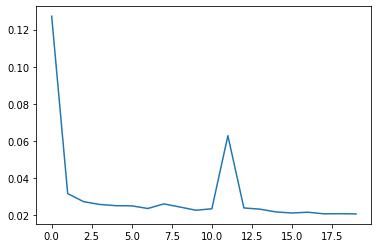

In [46]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [47]:
import time
start=time.time()
Yp= model.predict(X_test1)
end=time.time()
continental=end-start
print("inference time:",continental)
print(Yp)

79/79 [==============================] - 2s 6ms/step
inference time: 1.6366252899169922
[[-0.99456954]
 [-0.9950776 ]
 [-0.9955596 ]
 ...
 [-0.9972464 ]
 [-0.9981251 ]
 [-0.9984876 ]]


In [48]:
Yp.shape

(2522, 1)

In [49]:
pred= s2.inverse_transform(Yp)

In [50]:
Actual= s2.inverse_transform(y_test1)

In [51]:
x= pred
z= Actual

In [52]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(z,x)
RMSE = math.sqrt(MSE)
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(z,x)
from sklearn.metrics import mean_absolute_percentage_error
MAPE=mean_absolute_percentage_error(z,x)
print("Root Mean Square Error:",RMSE)
print("Mean Square Error:", MSE)
print("Mean Absolute Error:",MAE)
print("Mean Absolute Percentage Error:",MAPE)

Root Mean Square Error: 19.40164026550316
Mean Square Error: 376.4236449919935
Mean Absolute Error: 8.087846316674888
Mean Absolute Percentage Error: 3147985202862107.5


In [53]:
max= x.max()
min= x.min()
mean= x.mean()
max,min,mean

(299.9267, -0.9862313, 42.690475)

In [54]:
NRMSE= (RMSE/(max-min))*100
NRMSE

6.447592680558456

In [55]:
Calculated =pd.DataFrame(x, columns = ['Prediction'])
Actual = pd.DataFrame(z, columns = ['Actual'])


In [56]:
Calculated.to_csv(r"E:\CatBoost_1\Golden\LSTM\cloudy_hours\prediction.csv")

In [57]:
Actual.to_csv(r"E:\CatBoost_1\Golden\LSTM\cloudy_hours\Actual.csv")